In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_columns",200)
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['user_id' ,'order_dt','order_products','order_amount']

In [3]:
df = pd.read_table("D:/GitHub/datasets/CDNOW_master.txt",names = columns,sep = "\s+")

d:\python\virtualenvs\jupy36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [4]:
df.head()

user_id  order_dt  order_products  order_amount
0        1  19970101               1         11.77
1        2  19970112               1         12.00
2        2  19970112               5         77.00
3        3  19970102               2         20.76
4        3  19970330               2         20.76

In [5]:
df.describe()

user_id      order_dt  order_products  order_amount
count  69659.000000  6.965900e+04    69659.000000  69659.000000
mean   11470.854592  1.997228e+07        2.410040     35.893648
std     6819.904848  3.837735e+03        2.333924     36.281942
min        1.000000  1.997010e+07        1.000000      0.000000
25%     5506.000000  1.997022e+07        1.000000     14.490000
50%    11410.000000  1.997042e+07        2.000000     25.980000
75%    17273.000000  1.997111e+07        3.000000     43.700000
max    23570.000000  1.998063e+07       99.000000   1286.010000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [7]:
df["order_date"] = pd.to_datetime(df["order_dt"],format="%Y%m%d")

In [8]:
df["month"] = df.order_date.values.astype('datetime64[M]')

In [9]:
# df["month2"] = pd.tseries.offsets.MonthBegin(1)

In [10]:
df.head()

user_id  order_dt  order_products  order_amount order_date      month
0        1  19970101               1         11.77 1997-01-01 1997-01-01
1        2  19970112               1         12.00 1997-01-12 1997-01-01
2        2  19970112               5         77.00 1997-01-12 1997-01-01
3        3  19970102               2         20.76 1997-01-02 1997-01-01
4        3  19970330               2         20.76 1997-03-30 1997-03-01

#### 上述描述都是针对于订单，现在来看基于用户的

In [11]:
user_grouped = df.groupby('user_id').sum()

In [12]:
user_grouped.head()

order_dt  order_products  order_amount
user_id                                         
1         19970101               1         11.77
2         39940224               6         89.00
3        119833602              16        156.46
4         79882233               7        100.50
5        219686137              29        385.61

In [13]:
user_grouped.describe()

order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000

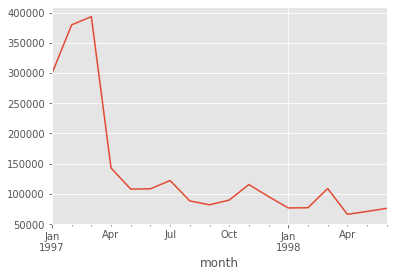

In [14]:
df.groupby('month').order_amount.sum().plot()

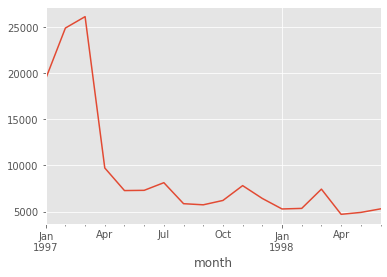

In [15]:
df.groupby('month').order_products.sum().plot()

### 以上情况两种可能：1月有异常值，或有促销

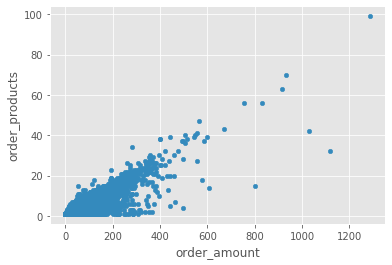

In [16]:
df.plot.scatter(x = "order_amount" , y = "order_products")

### 订单消费金额和订单商品量呈规律性，每个商品十元左右。订单的极值较少，超出1000的就几个。显然不是异常波动的罪魁祸首。

#### 消费能力特别强的用户有，但是数量不多。为了更好的观察，用直方图

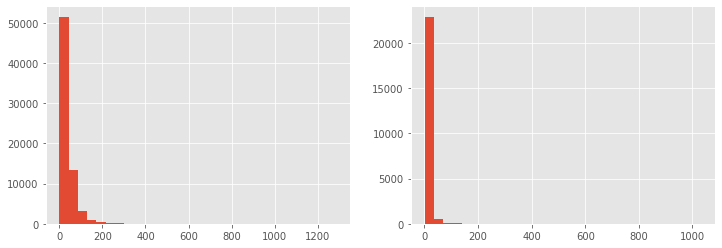

In [17]:
plt.figure(figsize = (12,4))
plt.subplot(121)
df.order_amount.hist(bins = 30)
plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins = 30)

# 研究时间节点

In [18]:
# 首次消费月份
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [19]:
# 用户最近一次消费
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [20]:
# 绝大部分数据依然集中在前三个月，后续的时间段内，依然有用户在消费，但是缓慢减少

### 复购率和回购率

In [21]:
#数据透
pivoted_counts = df.pivot_table(index = "user_id",
                                columns="month",
                               values="order_dt",
                               aggfunc='count').fillna(0)
#有些用户在某月没有进行过消费，会用NaN表示，这里用fillna填充

In [22]:
columns_month = df.month.sort_values().astype('str').unique() # 优化日期格式

In [23]:
pivoted_counts.columns = columns_month

In [24]:
pivoted_counts.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               1.0         0.0         0.0         0.0         0.0   
2               2.0         0.0         0.0         0.0         0.0   
3               1.0         0.0         1.0         1.0         0.0   
4               2.0         0.0         0.0         0.0         0.0   
5               2.0         1.0         0.0         1.0         1.0   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               0.0         0.0         0.0         0.0         0.0   
4               0.0         0.0         1.0         0.0         0.0   
5               1.0         1.0         0.0         1.0         0.0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               2.0         0.0         0.0         0.0         0.0   
4               0.0         1.0         0.0         0.0         0.0   
5               0.0         2.0         1.0         0.0         0.0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               0.0         0.0         0.0  
2               0.0         0.0         0.0  
3               0.0         1.0         0.0  
4               0.0         0.0         0.0  
5               0.0         0.0         0.0

## 复购率，复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。
##### 如果一个用户在同一天下了两笔订单也算

In [25]:
# 消费两次及以上记为1，消费一次记为0，没有消费记为NaN
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN 
                                               if x == 0 else 0)
pivoted_counts_transf.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               0.0         NaN         NaN         NaN         NaN   
2               1.0         NaN         NaN         NaN         NaN   
3               0.0         NaN         0.0         0.0         NaN   
4               1.0         NaN         NaN         NaN         NaN   
5               1.0         0.0         NaN         0.0         0.0   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               NaN         NaN         NaN         NaN         NaN   
4               NaN         NaN         0.0         NaN         NaN   
5               0.0         0.0         NaN         0.0         NaN   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               1.0         NaN         NaN         NaN         NaN   
4               NaN         0.0         NaN         NaN         NaN   
5               NaN         1.0         0.0         NaN         NaN   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               NaN         NaN         NaN  
2               NaN         NaN         NaN  
3               NaN         0.0         NaN  
4               NaN         NaN         NaN  
5               NaN         NaN         NaN

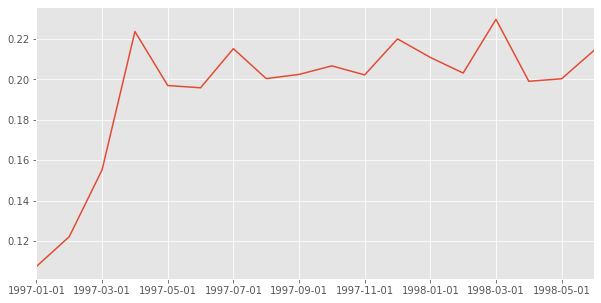

In [26]:
# 出图
(pivoted_counts_transf.sum() / pivoted_counts_transf.count()).plot(figsize = (10,5))

## 回购率：某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。我1月消费用户1000，他们中有300个2月依然消费，回购率是30%

In [27]:
pivoted_amount = df.pivot_table(index = 'user_id',
                               columns = 'month',
                               values = 'order_amount',
                               aggfunc = "mean").fillna(0) # mean,练习用

In [28]:
columns_month = df.month.sort_values().astype('str').unique()

In [29]:
pivoted_amount.columns = columns_month

In [30]:
pivoted_amount.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1             11.77         0.0        0.00        0.00        0.00   
2             44.50         0.0        0.00        0.00        0.00   
3             20.76         0.0       20.76       19.54        0.00   
4             29.53         0.0        0.00        0.00        0.00   
5             21.65        38.9        0.00       45.55       38.71   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1              0.00        0.00        0.00        0.00         0.0   
2              0.00        0.00        0.00        0.00         0.0   
3              0.00        0.00        0.00        0.00         0.0   
4              0.00        0.00       14.96        0.00         0.0   
5             26.14       28.14        0.00       40.47         0.0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1             0.000       0.000        0.00         0.0         0.0   
2             0.000       0.000        0.00         0.0         0.0   
3            39.205       0.000        0.00         0.0         0.0   
4             0.000      26.480        0.00         0.0         0.0   
5             0.000      43.465       37.47         0.0         0.0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               0.0        0.00         0.0  
2               0.0        0.00         0.0  
3               0.0       16.99         0.0  
4               0.0        0.00         0.0  
5               0.0        0.00         0.0

In [31]:
# 只要有过购买就是1，没有就是0
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x > 0 else 0) #转换格式
pivoted_purchase.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1                 1           0           0           0           0   
2                 1           0           0           0           0   
3                 1           0           1           1           0   
4                 1           0           0           0           0   
5                 1           1           0           1           1   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           1           0           0   
5                 1           1           0           1           0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 1           0           0           0           0   
4                 0           1           0           0           0   
5                 0           1           1           0           0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1                 0           0           0  
2                 0           0           0  
3                 0           1           0  
4                 0           0           0  
5                 0           0           0

In [32]:
pivoted_purchase.shape

(23570, 18)

In [38]:
def purchase_return(data):
        status = []
        for i in range(17):
            if data[i] == 1:
                if data[i+1] == 1:
                    status.append(1)
                if data[i+1] == 0:
                    status.append(0)
            else:
                status.append(np.NaN)
        status.append(np.NaN)
        return pd.Series(status)
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis=1)#转换格式
pivoted_purchase_return.head()

0    1    2    3    4    5    6    7    8   9    10   11   12  13  \
user_id                                                                       
1        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN   
2        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN   
3        0.0  NaN  1.0  0.0  NaN  NaN  NaN  NaN  NaN NaN  0.0  NaN  NaN NaN   
4        0.0  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN NaN  NaN  0.0  NaN NaN   
5        1.0  0.0  NaN  1.0  1.0  1.0  0.0  NaN  0.0 NaN  NaN  1.0  0.0 NaN   

         14  15   16  17  
user_id                   
1       NaN NaN  NaN NaN  
2       NaN NaN  NaN NaN  
3       NaN NaN  0.0 NaN  
4       NaN NaN  NaN NaN  
5       NaN NaN  NaN NaN

In [36]:
ret_purchasr_ratio = pivoted_purchase_return.sum() / pivoted_purchase_return.count() #回购率

#### 新建一个判断函数。data是输入的数据，即用户在18个月内是否消费的记录，status是空列表，后续用来保存用户是否回购的字段。
#### 因为有18个月，所以每个月都要进行一次判断，需要用到循环。if的主要逻辑是，如果用户本月进行过消费，且下月消费过，记为1，没有消费过是0。本月若没有进行过消费，为NaN，后续的统计中进行排除。
#### 用apply函数应用在所有行上，获得想要的结果。

In [37]:
ret_purchasr_ratio

array([ 0., nan, nan, ..., nan, nan, nan])

In [ ]:
pivoted_purchase_return_1 = pd.DataFrame(pivoted_purchase_return)

In [ ]:
pivoted_purchase_return_1 = pivoted_purchase_return_1.reset_index()

In [ ]:
pivoted_purchase_return_1.head()

In [ ]:
pivoted_purchase_return_1.columns = ['a','b']

In [ ]:
pivoted_purchase_return_1.head()

In [ ]:
split1 = pd.DataFrame((x.split(',') for x in pivoted_purchase_return_1['b']),index=pivoted_purchase_return_1.index,columns=colimns_month)
pivoted_purchase_return_1 = pd.merge(pivoted_purchase_return_1, split1, left_index=True, right_index=True)